In [2]:
import csv
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassificationReport

In [5]:
df = pd.read_csv('winequality-red.csv', header=0)
bins = [1,4,6,10]
quality_labels=[0,1,2]
df['label'] = pd.cut(df['quality'], bins=bins, labels=quality_labels, include_lowest=True)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'] = df['label'].astype('float')
y = df['label']
X = df.drop(['quality', 'label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [10]:
rfc = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, random_state=42, max_features='sqrt', oob_score=True, n_jobs = -1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
scorer = make_scorer(accuracy_score)
rfc_cv_score = cross_val_score(rfc, X, y, cv=20, scoring=scorer)
cm=(confusion_matrix(y_test, rfc_predict))
print("=== Confusion Matrix ===")
cm

=== Confusion Matrix ===


array([[  0,  11,   0],
       [  0, 253,   9],
       [  0,  22,  25]], dtype=int64)

In [11]:
#classification Report
classification_report(y_test, rfc_predict)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.88      0.97      0.92       262
         2.0       0.74      0.53      0.62        47

   micro avg       0.87      0.87      0.87       320
   macro avg       0.54      0.50      0.51       320
weighted avg       0.83      0.87      0.85       320



C:\Users\patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
#Accuracy Score
rfc_cv_score.mean()

0.8462312545830478

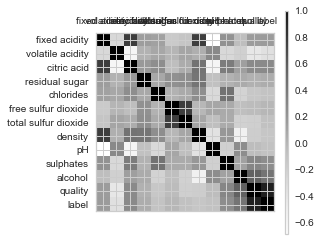

In [7]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar(aspect=100)
plt.show()

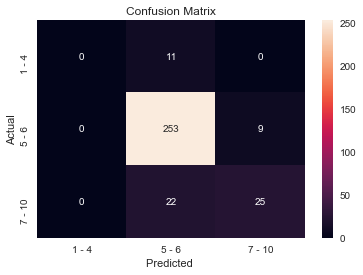

In [8]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt= 'g')
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1 - 4', '5 - 6', '7 - 10' ]); ax.yaxis.set_ticklabels(['1 - 4', '5 - 6', '7 - 10' ])
plt.show()

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


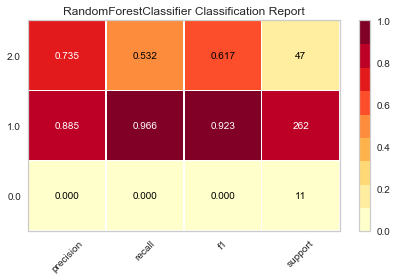

In [9]:
visualizer = ClassificationReport(rfc, support=True)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.poof() 